## My first markov chain

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)

**Important:** 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroML import stats
from tqdm.notebook import tqdm

In [2]:
#markov chain will be a list
N = int(1e5)
x = np.zeros(N)

p_cle_cle = 0.9
p_cle_clo = 0.5
p_clo_cle = 0.1
p_clo_clo = 0.5

# 0 will be cloudy 1 will be clear

In [5]:
proposal = 0
current = proposal

for i in tqdm(range(N)):
    if proposal == 0:
        accepted = np.random.rand() < p_cle_clo #if true my next day will be clear, if false it will stay cloudy
        if accepted:
            current = 1
            
    if proposal == 1:
        accepted = np.random.rand() < p_clo_cle #if true my next day will be cloudy, if false it will stay clear
        if accepted:
            current = 0
    x[i] = current
    proposal = current

  0%|          | 0/100000 [00:00<?, ?it/s]

- Prepare a plot with the number of days on the x axis and the cumulative number of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.

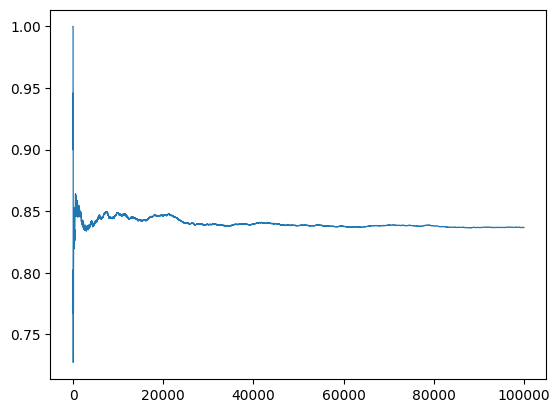

In [6]:
days = np.arange(1,N+1)
sunny = np.cumsum(x)/days
plt.plot(days, sunny, lw = .9);

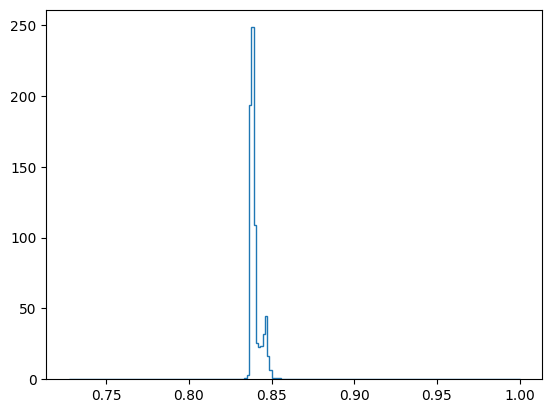

In [7]:
plt.hist(sunny, bins=200, density=True, histtype = 'step');

- Use a summary statistics to determine the most likely value and an error on our estimate.

In [16]:
#statistics
m = np.mean(sunny)
med = np.median(sunny)
sigma = np.std(sunny)
sigma_med = stats.sigmaG(sunny)

print(round(m,5), round(sigma,5))
print(round(med,5), round(sigma_med,5))

#which one is better and why? the median is less affected by outliers

0.83983 0.00443
0.83857 0.00206


Remember! the first guesses are to throw away, this is due to the **burn in phase**, we can chop off the non stationary part of the process

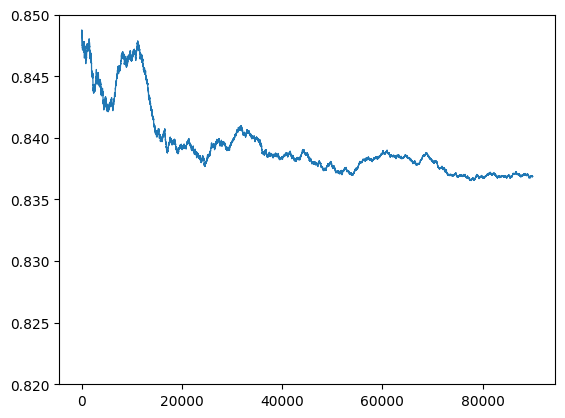

In [12]:
burned_sunny = sunny[int(1e4):]

plt.plot(burned_sunny, lw = .9)
plt.ylim(0.82, 0.85);

And so our distribution becomes

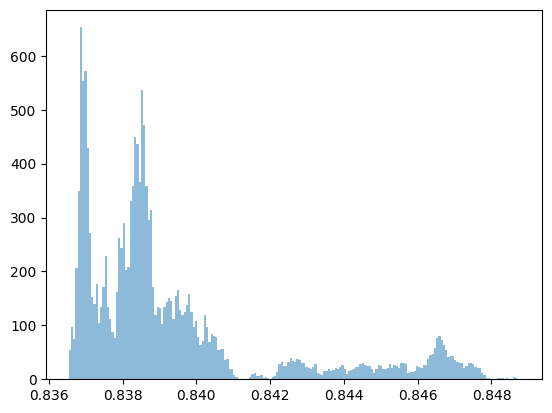

In [13]:
plt.hist(burned_sunny, bins=200, density=True, alpha = 0.5); #no long tails anymore

In [15]:
#statistics
m_b = np.mean(burned_sunny)
med_b = np.median(burned_sunny)
sigma_b = np.std(burned_sunny)
sigma_med_b = stats.sigmaG(burned_sunny)

print(round(m_b,5), round(sigma_b,5))
print(round(med_b,5), round(sigma_med_b,5))

0.83937 0.0028
0.83851 0.0017


You can check to see which was the better statistic estimator, i got my cash on the median

In [28]:
d = abs(m - m_b)
print('Means deviation: %.2e' % d)

d = abs(med - med_b)
print('Median deviation: %.2e' % d)

Means deviation: 4.61e-04
Median deviation: 6.09e-05


Which means the median wins by a whole order of magnitude, though both are compatible since these two deviations are well within the $1\sigma$ range